In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import os

In [2]:
class Step:
    step_types = [
        'insert',
        'delete',
        'initial',
        'batchInsert',
        'batchDelete',
        'insertSequential',
#         'deleteSequential',
#         'deleteSequentialCompactRange',
        'wait'
    ]
    
    def __init__(self, name, du, records, duration, sysmem):
        self.name = name
        self.du = du
        self.records = records
        self.duration = duration
        self.sysmem = sysmem
        
    def __str__(self):
        return f"Step({self.name}, {self.du}, {self.records}, {self.duration}, {self.sysmem})"
    
    def __repr__(self):
        return f"Step({self.name}, {self.du}, {self.records}, {self.duration}, {self.sysmem})"
    
    def parse_from_tokens(tokens):
        if len(tokens) != 5:
            raise Exception("Incorrect line")
        name = tokens[0]
        du = int(tokens[1])
        records = int(tokens[2])
        duration = int(tokens[3].split('.')[0])
        sysmem = int(tokens[4])
        return Step(name, du, records, duration, sysmem)
        
    def parse_from_file(file_path):
        steps = []
        with open(file_path) as f:
            for ln in f.readlines():
                tokens = ln.strip().split()
                if len(tokens) == 0:
                    continue
                if tokens[0] in Step.step_types:
                    steps.append(Step.parse_from_tokens(tokens))
        return steps

In [3]:
def draw_experiment(experiment_name):
    measurementsDIR = "measurements"
    files = [f for f in os.listdir(measurementsDIR) if os.path.isfile(os.path.join(measurementsDIR, f))]
    files = list(filter(lambda f: f.startswith(experiment_name), files))
    n = len(files)
    
    fig, axs = plt.subplots(n, 4, figsize=(15, 4 * n))
    axs = np.resize(axs, (n, 4))
    
    for i, file in enumerate(files):
        backend = re.split('_|\.', file)[1]
        steps = Step.parse_from_file(os.path.join(measurementsDIR, file))
        draw_steps(axs[i], steps, backend)
        
    plt.tight_layout()
    plt.show()
        

def draw_steps(ax, steps, backend):
    durations = [step.duration for step in steps]
    dus = [step.du for step in steps]
    records = [step.records for step in steps]
    sysmems = [step.sysmem for step in steps]
    x = [i for i in range(len(steps))]
    
    ax[0].text(-1, 0.5, backend, transform=ax[0].transAxes, va="center", fontsize=18)
    
    ax[0].plot(x, durations) 
    ax[0].set_xlabel("Steps")
    ax[0].set_ylabel("Durations")
    
    ax[1].plot(x, dus) 
    ax[1].set_xlabel("Steps")
    ax[1].set_ylabel("Disk usage MiB")
    
    ax[2].plot(x, records) 
    ax[2].set_xlabel("Steps")
    ax[2].set_ylabel("Records")
    
    ax[3].plot(x, sysmems) 
    ax[3].set_xlabel("Steps")
    ax[3].set_ylabel("SysMem MiB")

## Insert-delete
In this experiment we perform 100 rounds of insertion of n sequential values of size 1MiB followed by a deletion of those. For n in {64, 256, 1024}

Metrics are taken after insertion step

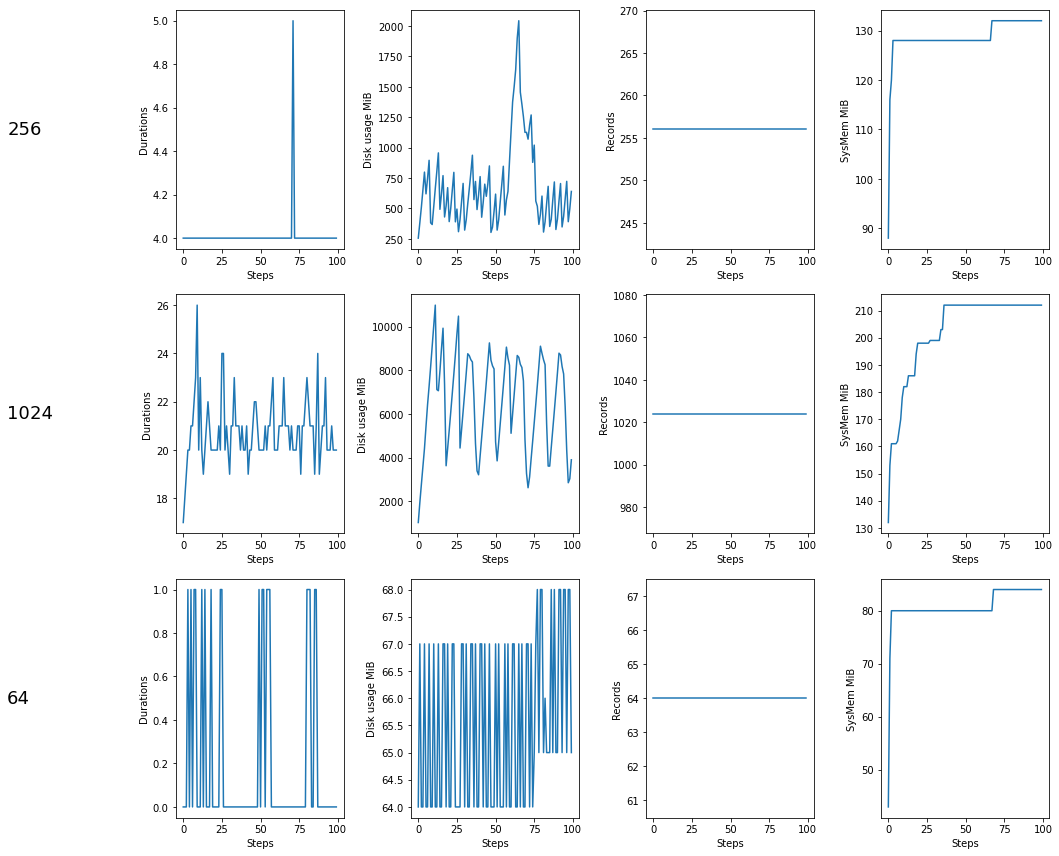

In [9]:
draw_experiment("TestGoLevelDBCompactionSequential_")

## Insert-delete + rangeCompact
In this experiment we perform 100 rounds of insertion of n sequential values of size 1MiB followed by a deletion of those followed by a `rangeCompact` for that range. For n in {64, 256, 1024}

Metrics are taken after insertion step

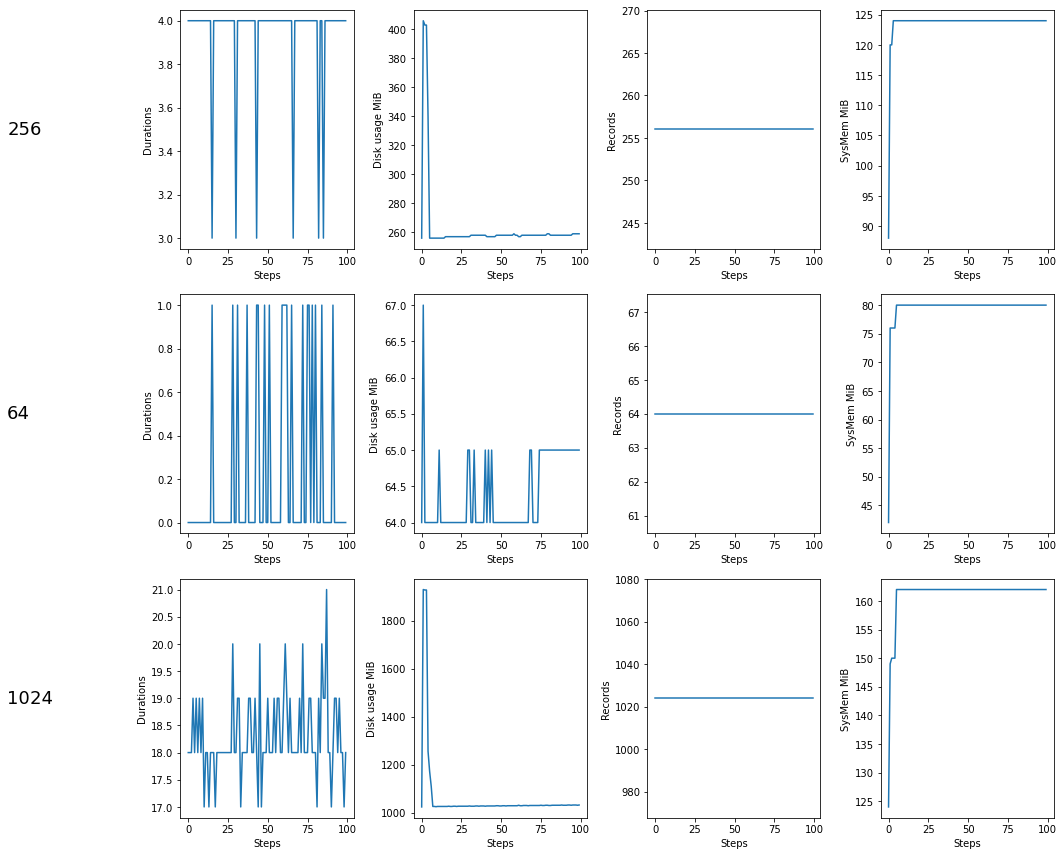

In [8]:
draw_experiment("TestGoLevelDBCompactionSequentialRangeCompact")

## Insert-delete + rangeCompact Long
In this experiment we perform 1 hour of insertion of 1024 sequential values of size 1MiB followed by a deletion of those followed by a `rangeCompact` for that range. 

The initial storage size is 5 GiB

Metrics are taken after insertion step

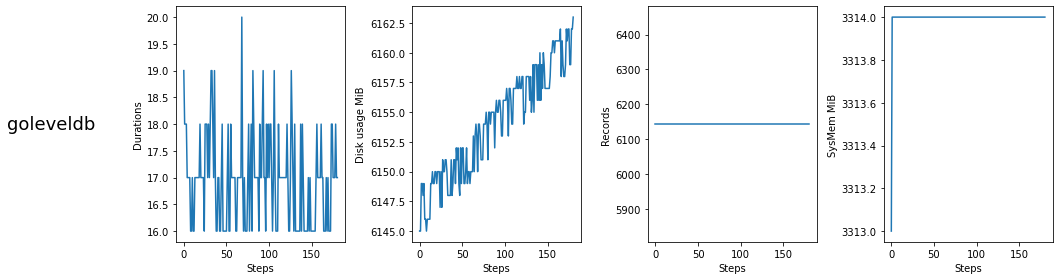

In [4]:
draw_experiment("TestLongFluctuations")

## Insert-delete + rangeCompact

Compaction duration: 6.661449429s
Put duration: 45.971465545s
DirSize: 802